# Introduction

The roots of pandas lay in analyzing financial time series data. The author, Wes McKinney, was not satisfied with the available Python tools at that time, and decided to build pandas to support his own needs at the hedge fund he was working at. Broadly speaking, time series are simply points of data gathered over time. Most typically, the time is evenly spaced between each data point. Pandas has excellent functionality with regards to manipulating dates, aggregating over different time periods, sampling different periods of time, and much more.

In [1]:
import pandas as pd
import numpy as np
import datetime

%matplotlib inline

# Understanding the difference between Python and pandas date tools

Before we get to pandas, it can help to be aware of and understand core Python's date and time functionality. The datetime module provides three distinct data types, date, time, and datetime. Formally, a date is a moment in time consisting of just the year, month, and day. For instance, June 7, 2013 would be a date. A time consists of hours, minutes, seconds, and microseconds (one-millionth of a second) and is unattached to any date. An example of time would be 12 hours and 30 minutes. A datetime consists of both the elements of a date and time together.

On the other hand, pandas has a single object to encapsulate date and time called a Timestamp. It has nanosecond (one-billionth of a second) precision and is derived from NumPy's datetime64 data type. Both Python and pandas each have a timedelta object that is useful when doing date addition/subtraction.

### Getting ready

In this recipe, we will first explore Python's datetime module and then turn to the corresponding and superior date tools in pandas.

### How to do it...

Let's begin by importing the datetime module into our namespace and creating a date, time, and datetime object:

In [2]:
date = datetime.date(year=2013, month=6, day=7)
time = datetime.time(hour=12, minute=30, second=19, microsecond=463198)
dt = datetime.datetime(year=2013, month=6, day=7, 
                       hour=12, minute=30, second=19, microsecond=463198)

print("date is ", date)
print("time is", time)
print("datetime is", dt)

date is  2013-06-07
time is 12:30:19.463198
datetime is 2013-06-07 12:30:19.463198


Let's construct and print out a timedelta object, the other major data type from the datetime module:

In [3]:
td = datetime.timedelta(weeks=2, days=5, hours=10, minutes=20, 
                        seconds=6.73, milliseconds=99, microseconds=8)
print(td)

19 days, 10:20:06.829008


Add/subtract this timedelta to the date and datetime objects from step 1:

In [4]:
print('new date is', date + td)
print('new datetime is', dt + td)

new date is 2013-06-26
new datetime is 2013-06-26 22:50:26.292206


Attempting to add a timedelta to a time object isn't possible:

In [5]:
time + td

TypeError: unsupported operand type(s) for +: 'datetime.time' and 'datetime.timedelta'

Let's turn to pandas and its Timestamp object, which is a moment in time with nanosecond precision. The Timestamp constructor is very flexible, and handles a wide variety of inputs:


In [6]:
pd.Timestamp(year=2012, month=12, day=21, hour=5, minute=10, second=8, microsecond=99)

Timestamp('2012-12-21 05:10:08.000099')

In [7]:
pd.Timestamp('2016/1/10')

Timestamp('2016-01-10 00:00:00')

In [8]:
pd.Timestamp('2014-5/10')

Timestamp('2014-05-10 00:00:00')

In [9]:
pd.Timestamp('Jan 3, 2019 20:45.56')

Timestamp('2019-01-03 20:45:33')

In [10]:
pd.Timestamp('2016-01-05T05:34:43.123456789')

Timestamp('2016-01-05 05:34:43.123456789')

It's also possible to pass in a single integer or float to the Timestamp constructor which returns a date equivalent to the number of nanoseconds after the Unix epoch, which is January 1, 1970:

In [11]:
pd.Timestamp(500)

Timestamp('1970-01-01 00:00:00.000000500')

In [12]:
pd.Timestamp(5000, unit='D')

Timestamp('1983-09-10 00:00:00')

Pandasprovides theto_datetime function that works fairly similarly to the Timestamp constructor, but comes with a few different parameters for special situations. See the following examples:

In [13]:
pd.to_datetime('2015-5-13')

Timestamp('2015-05-13 00:00:00')

In [14]:
pd.to_datetime('2015-13-5', dayfirst=True)

Timestamp('2015-05-13 00:00:00')

In [15]:
pd.Timestamp('Saturday September 30th, 2017')

Timestamp('2017-09-30 00:00:00')

In [16]:
pd.to_datetime('Start Date: Sep 30, 2017 Start Time: 1:30 pm', format='Start Date: %b %d, %Y Start Time: %I:%M %p')

Timestamp('2017-09-30 13:30:00')

In [17]:
pd.to_datetime(100, unit='D', origin='2013-1-1')

Timestamp('2013-04-11 00:00:00')

The to_datetime function comes equipped with even more functionality. It is capable of converting entire lists or Series of strings or integers to Timestamps. Since we are far more likely to interact with Series or DataFrames and not single scalar values, you are far more likely to use to_datetime than Timestamp:

In [18]:
s = pd.Series([10, 100, 1000, 10000])
pd.to_datetime(s, unit='D')

0   1970-01-11
1   1970-04-11
2   1972-09-27
3   1997-05-19
dtype: datetime64[ns]

In [19]:
s = pd.Series(['12-5-2015', '14-1-2013', '20/12/2017', '40/23/2017'])
pd.to_datetime(s, dayfirst=True, errors='coerce')

0   2015-05-12
1   2013-01-14
2          NaT
3          NaT
dtype: datetime64[ns]

In [20]:
pd.to_datetime(['Aug 3 1999 3:45:56', '10/31/2017'])

ValueError: time data "10/31/2017" doesn't match format "%b %d %Y %H:%M:%S", at position 1. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

Analogously to the Timestamp constructor and the to_datetime function, pandas has Timedelta and to_timedelta to represent an amount of time. Both the Timedelta constructor and the to_timedelta function can create a single Timedelta object. Like to_datetime, to_timedelta has quite a bit more functionality and can convert entire lists or Series into Timedelta objects.

In [21]:
pd.Timedelta('12 days 5 hours 3 minutes 123456789 nanoseconds')

Timedelta('12 days 05:03:00.123456789')

In [22]:
pd.Timedelta(days=5, minutes=7.34)

Timedelta('5 days 00:07:20.400000')

In [23]:
pd.Timedelta(100, unit='W')

Timedelta('700 days 00:00:00')

In [24]:
pd.to_timedelta('5 dayz', errors='ignore')

'5 dayz'

In [25]:
pd.to_timedelta('67:15:45.454')

Timedelta('2 days 19:15:45.454000')

In [26]:
s = pd.Series([10, 100])
pd.to_timedelta(s, unit='s')

0   0 days 00:00:10
1   0 days 00:01:40
dtype: timedelta64[ns]

In [27]:
time_strings = ['2 days 24 minutes 89.67 seconds', '00:45:23.6']
pd.to_timedelta(time_strings)

TimedeltaIndex(['2 days 00:25:29.670000', '0 days 00:45:23.600000'], dtype='timedelta64[ns]', freq=None)

Timedeltas may be added or subtracted from Timestamps and from each other. They may even be divided from each other to return a float:

In [28]:
pd.Timedelta('12 days 5 hours 3 minutes') * 2

Timedelta('24 days 10:06:00')

In [29]:
pd.Timestamp('1/1/2017') + pd.Timedelta('12 days 5 hours 3 minutes') * 2

Timestamp('2017-01-25 10:06:00')

In [30]:
td1 = pd.to_timedelta([10, 100], unit='s')
td2 = pd.to_timedelta(['3 hours', '4 hours'])
td1 + td2

TimedeltaIndex(['0 days 03:00:10', '0 days 04:01:40'], dtype='timedelta64[ns]', freq=None)

In [31]:
pd.Timedelta('12 days') / pd.Timedelta('3 days')

4.0

Both Timestamps and Timedeltas have a large numbera of features available as attributes and methods. Let's sample a few of them:

In [32]:
ts = pd.Timestamp('2016-10-1 4:23:23.9')

In [33]:
ts.ceil('h')

Timestamp('2016-10-01 05:00:00')

In [34]:
ts.year, ts.month, ts.day, ts.hour, ts.minute, ts.second

(2016, 10, 1, 4, 23, 23)

In [35]:
ts.dayofweek, ts.dayofyear, ts.daysinmonth

(5, 275, 31)

In [36]:
ts.to_pydatetime()

datetime.datetime(2016, 10, 1, 4, 23, 23, 900000)

In [37]:
td = pd.Timedelta(125.8723, unit='h')
td

Timedelta('5 days 05:52:20.280000')

In [38]:
td.round('min')

Timedelta('5 days 05:52:00')

In [39]:
td.components

Components(days=5, hours=5, minutes=52, seconds=20, milliseconds=280, microseconds=0, nanoseconds=0)

In [40]:
td.total_seconds()

453140.28

### How it works...

The datetime module is part of the Python standard library, and is very popular and widely used. For this reason, it is a good idea to have some familiarity with it, as you will likely cross paths with it. The datetime module is actually fairly simple with a total of only six types of objects: date, time, datetime, timedelta along with two others on timezones. The pandas Timestamp and Timedelta objects have all the functionality of their datetime module counterparts and more. It will be possible to remain completely in pandas when working with time series.

Step 1 shows how to create datetimes, dates, times, and timedeltas with the datetime module. Only integers may be used as each component of the date or time, and are passed as separate arguments. Compare this to step 5 where the pandas Timestamp constructor can accept the same components as arguments, as well as a wide variety of date strings. In addition to integer components and strings, step 6 shows how a single numeric scalar can be used as a date. The units of this scalar are defaulted to nanoseconds (ns) but are changed to days (D) in the second statement with the other options being hours (h), minutes (m), seconds (s), milliseconds (ms), and microseconds (µs).

Step 2 details the construction of the datetime module's timedelta object with all of its parameters. Again, compare this to the pandas Timedelta constructor shown in step 9, which accepts these same parameters along with strings and scalar numerics.

In addition to the Timestamp and Timedelta constructors, which are only capable of creating a single object, the to_datetime and to_timedelta functions can convert entire sequences of integers or strings to the desired type. These functions also provide several more parameters not available with the constructors. One of these parameters is errors, which is defaulted to the string value raise but can also be set to ignore or coerce. Whenever a string date is unable to be converted, the errors parameter determines what action to take. When set to raise, an exception is raised and program execution stops. When set to ignore, the original sequence gets returned as it was prior to entering the function. When set to coerce, the NaT (not a time) object is used to represent the new value. The second statement of step 8 converts all values to a Timestamp correctly, except for the last one, which is forced to become NaT.

Another one of these parameters available only to to_datetime is format, which is particularly useful whenever a string contains a particular date pattern that is not automatically recognized by pandas. In the third statement of step 7, we have a datetime enmeshed inside some other characters. We substitute the date and time pieces of the string with their respective formatting directives.

#### Note
A date formatting directive appears as a single percentage sign, %, followed by a single character. Each directive specifies some part of a date or time. See the official Python documentation for a table of all the directives (http://bit.ly/2kePoRe).

### There's more...

The date formatting directive can actually make quite a large difference when converting a large sequence of strings to Timestamps. Whenever pandas uses to_datetime to convert a sequence of strings to Timestamps, it searches a large number of different string combinations that represent dates. This is true even if all the strings have the same format. With the format parameter, we can specify the exact date format, so that pandas doesn't have to search for the correct one each time. Let's create a list of dates as strings and time their conversion to Timestamps both with and without a formatting directive:



In [41]:
date_string_list = ['Sep 30 1984'] * 10000

In [42]:
%timeit pd.to_datetime(date_string_list, format='%b %d %Y')

4.87 ms ± 152 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [43]:
%timeit pd.to_datetime(date_string_list)

5.49 ms ± 323 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Slicing time series intelligently
DataFrame selection and slicing was thoroughly covered in Chapter 4, Selecting Subsets of Data. When the DataFrame posses a DatetimeIndex, even more opportunities arise for selection and slicing.

### Getting ready

In this recipe, we will use partial date matching to select and slice a DataFrame with a DatetimeIndex.

### How to do it...

Read in the Denver crimes dataset from the hdf5 file crimes.h5, and output the column data types and the first few rows. The hdf5 file format allows efficient storage of large scientific data and is completely different from a CSV text file.

In [44]:
crime = pd.read_hdf('data/crime.h5', 'crime')
crime.dtypes

OFFENSE_TYPE_ID              category
OFFENSE_CATEGORY_ID          category
REPORTED_DATE          datetime64[ns]
GEO_LON                       float64
GEO_LAT                       float64
NEIGHBORHOOD_ID              category
IS_CRIME                        int64
IS_TRAFFIC                      int64
dtype: object

Notice that there are three categorical columns and a Timestamp (denoted by NumPy's datetime64 object). These data types were stored whenever the data file was created, unlike a CSV file, which only stores raw text. Set the REPORTED_DATE column as the index in order to make intelligent Timestamp slicing possible:

In [45]:
crime = crime.set_index('REPORTED_DATE')
crime.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 01:54:00,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0


In [46]:
pd.options.display.max_rows = 4

As usual, it is possible to select all the rows equal to a single index by passing that value to the .loc indexing operator:

In [47]:
crime.loc['2016-05-12 16:45:00']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2016-05-12 16:45:00,traffic-accident,traffic-accident,-104.847024,39.779596,montbello,0,1
2016-05-12 16:45:00,traffic-accident,traffic-accident,-105.049180,39.769296,west-highland,0,1
2016-05-12 16:45:00,fraud-identity-theft,white-collar-crime,-104.931971,39.717359,hilltop,1,0


With a Timestamp in the index, it is possible to select all rows that partially match an index value. For instance, if we wanted all the crimes from May 5, 2016, we would simply select it as follows:


In [48]:
crime.loc['2016-05-12']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2016-05-12 23:51:00,criminal-mischief-other,public-disorder,-105.017241,39.705845,athmar-park,1,0
2016-05-12 18:40:00,liquor-possession,drug-alcohol,-104.995692,39.747875,cbd,1,0
...,...,...,...,...,...,...,...
2016-05-12 15:59:00,menacing-felony-w-weap,aggravated-assault,-104.935172,39.723703,hilltop,1,0
2016-05-12 16:39:00,assault-dv,other-crimes-against-persons,-104.974700,39.740555,north-capitol-hill,1,0


Not only can you select a single date inexactly, but you can do so for an entire month, year, or even hour of the day

In [49]:
crime.loc['2016-05'].shape

(8012, 7)

In [50]:
crime.loc['2016'].shape

(91076, 7)

In [51]:
crime.loc['2016-05-12 03'].shape

(4, 7)

The selection strings may also contain the name of the month:

In [52]:
crime.loc['Dec 2015'].sort_index()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2015-12-01 00:48:00,drug-cocaine-possess,drug-alcohol,-104.891681,39.740155,east-colfax,1,0
2015-12-01 00:48:00,theft-of-motor-vehicle,auto-theft,-104.891681,39.740155,east-colfax,1,0
...,...,...,...,...,...,...,...
2015-12-31 23:45:00,violation-of-restraining-order,all-other-crimes,-105.034887,39.741827,west-colfax,1,0
2015-12-31 23:50:00,weapon-poss-illegal-dangerous,all-other-crimes,-105.032769,39.709188,westwood,1,0


Many other string patterns with month name included also work:

In [53]:
crime.loc['2016 Sep, 15'].shape

(252, 7)

In [54]:
crime.loc['21st October 2014 05'].shape

(4, 7)

In addition to selection, you may use the slice notation to select precise ranges of data:

In [56]:
crime.sort_index().loc['2015-3-4':'2016-1-1']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2015-03-04 00:11:00,assault-dv,other-crimes-against-persons,-105.021966,39.770883,sunnyside,1,0
2015-03-04 00:19:00,assault-dv,other-crimes-against-persons,-104.978988,39.748799,five-points,1,0
...,...,...,...,...,...,...,...
2016-01-01 23:45:00,drug-cocaine-possess,drug-alcohol,-104.987310,39.753598,five-points,1,0
2016-01-01 23:48:00,drug-poss-paraphernalia,drug-alcohol,-104.986020,39.752541,five-points,1,0


Notice that all crimes committed on the end date regardless of the time are included in the returned result. This is true for any result using the label-based .loc indexer. You can provide as much precision (or lack thereof) to any start or end portion of the slice:


In [57]:
crime.sort_index().loc['2015-3-4 22':'2016-1-1 23:45:00']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2015-03-04 22:25:00,traffic-accident-hit-and-run,traffic-accident,-104.973896,39.769064,five-points,0,1
2015-03-04 22:30:00,traffic-accident,traffic-accident,-104.906412,39.632816,hampden-south,0,1
...,...,...,...,...,...,...,...
2016-01-01 23:40:00,robbery-business,robbery,-105.039236,39.726157,villa-park,1,0
2016-01-01 23:45:00,drug-cocaine-possess,drug-alcohol,-104.987310,39.753598,five-points,1,0


### How it works...

One of the many nice features of hdf5 files is their ability to preserve the data types of each column, which substantially reduces the memory needed. In this case, three of these columns are stored as a pandas category instead of as an object. Storing them as object will lead to a four times increase in memory usage:

In [58]:
mem_cat = crime.memory_usage().sum()
mem_obj = crime.astype({'OFFENSE_TYPE_ID':'object', 
                        'OFFENSE_CATEGORY_ID':'object', 
                        'NEIGHBORHOOD_ID':'object'}).memory_usage(deep=True)\
                                                    .sum()
mb = 2 ** 20
round(mem_cat / mb, 1), round(mem_obj / mb, 1)

(35.5, 128.8)

In order to intelligently select and slice rows by date using the indexing operator, the index must contain date values. In step 2, we move the REPORTED_DATE column into the index and formally create a DatetimeIndex as the new index:

In [59]:
crime.index[:2]

DatetimeIndex(['2014-06-29 02:01:00', '2014-06-29 01:54:00'], dtype='datetime64[ns]', name='REPORTED_DATE', freq=None)

With a DatetimeIndex, a huge variety of strings may be used to select rows with the .loc indexer. In fact, all strings that can be sent to the pandas Timestamp constructor will work here. Surprisingly, it is actually not necessary to use the .loc indexer for any of the selections or slices in this recipe. The indexing operator by itself will work in exactly the same manner. For instance, the second statement of step 6 may be written as crime['21st October 2014 05']. The indexing operator is normally reserved for columns but flexibly allows for Timestamps to be used whenever there exists a DatetimeIndex.

Personally, I prefer using the .loc indexer when selecting rows and would always use it over the indexing operator by itself. The .loc indexer is explicit and the first value passed to it is always used to select rows.

Steps 8 and 9 show how slicing works in the same manner as selection from the previous steps. Any date that partially matches either the start or end value of the slice is included in the result.

### There's more...

Our original crimes DataFrame was not sorted and slicing still worked as expected. Sorting the index will lead to large gains in performance. Let's see the difference with slicing done from step 8:

In [62]:
%timeit crime.sort_index().loc['2015-3-4':'2016-1-1']

88.1 ms ± 1.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [63]:
crime_sort = crime.sort_index()

In [64]:
%timeit crime_sort.sort_index().loc['2015-3-4':'2016-1-1']

6.3 ms ± 240 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [65]:
pd.options.display.max_rows = 60

# Using methods that only work with a DatetimeIndex
There are a number of DataFrame/Series methods that only work with a DatetimeIndex. If the index is of any other type, these methods will fail.

### Getting ready

In this recipe, we will first use methods to select rows of data by their time component. We will then learn about the powerful DateOffset objects and their aliases.

### How to do it...

Read in the crime hdf5 dataset, set the index as REPORTED_DATE, and ensure that we have a DatetimeIndex:

In [66]:
crime = pd.read_hdf('data/crime.h5', 'crime').set_index('REPORTED_DATE')
print(type(crime.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


Use the between_time method to select all crimes that occurred between 2 a.m. and 5 a.m., regardless of the date:

In [68]:
crime.between_time('2:00', '5:00').head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0
2014-06-29 04:22:00,violation-of-restraining-order,all-other-crimes,-104.972447,39.739449,cheesman-park,1,0


Select all dates at a specific time with at_time:

In [69]:
crime.at_time('5:47').head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2013-11-26 05:47:00,criminal-mischief-other,public-disorder,-104.991476,39.751536,cbd,1,0
2017-04-09 05:47:00,criminal-mischief-mtr-veh,public-disorder,-104.959394,39.678425,university,1,0
2017-02-19 05:47:00,criminal-mischief-other,public-disorder,-104.986767,39.741336,north-capitol-hill,1,0
2017-02-16 05:47:00,aggravated-assault,aggravated-assault,-104.934029,39.732320,hale,1,0
2017-02-12 05:47:00,police-interference,all-other-crimes,-104.976306,39.722644,speer,1,0


The first methods provide an elegant way of selecting the first n segments of time, where n is an integer. These segments of time are formally represented by DateOffset objects that can be in the pd.offsets module. The DataFrame must be sorted on its index to guarantee that this method will work. Let's select the first six months of crime data:

In [70]:
crime_sort = crime.sort_index()

In [71]:
pd.options.display.max_rows = 6

This captured the data from January through June but also, surprisingly, selected a single row in July. The reason for this is that pandas actually uses the time component of the first element in the index, which, in this example, is 6 minutes. Let's use MonthEnd, a slightly different offset

In [72]:
crime_sort.first(pd.offsets.MonthEnd(6))

C:\Users\Sumanth\AppData\Local\Temp\ipykernel_8208\585970299.py:1: FutureWarning: first is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  crime_sort.first(pd.offsets.MonthEnd(6))


,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
...,...,...,...,...,...,...,...
2012-06-29 23:41:00,robbery-street,robbery,-104.991912,39.756163,five-points,1,0
2012-06-29 23:57:00,assault-simple,other-crimes-against-persons,-104.987360,39.715162,speer,1,0
2012-06-30 00:04:00,traffic-accident,traffic-accident,-104.894697,39.628902,hampden-south,0,1


This captured nearly the same amount of data but if you look closely, only a single row from June 30th was captured. Again, this is because the time component of the first index was preserved. The exact search went to 2012-06-30 00:06:00. So, how do we get exactly six months of data? There are a couple of ways. All DateOffsets have a normalize parameter that, when set to True, sets all the time components to zero. The following should get us very close to what we want:

In [73]:
crime_sort.first(pd.offsets.MonthBegin(6))

C:\Users\Sumanth\AppData\Local\Temp\ipykernel_8208\142712086.py:1: FutureWarning: first is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  crime_sort.first(pd.offsets.MonthBegin(6))


,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
...,...,...,...,...,...,...,...
2012-06-30 23:50:00,criminal-mischief-mtr-veh,public-disorder,-104.838271,39.788683,montbello,1,0
2012-06-30 23:54:00,traffic-accident-hit-and-run,traffic-accident,-105.014162,39.740439,lincoln-park,0,1
2012-07-01 00:01:00,robbery-street,robbery,-104.924292,39.767585,northeast-park-hill,1,0


In [74]:
crime_sort.first(pd.offsets.MonthBegin(6, normalize=True))

C:\Users\Sumanth\AppData\Local\Temp\ipykernel_8208\792946658.py:1: FutureWarning: first is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  crime_sort.first(pd.offsets.MonthBegin(6, normalize=True))


,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
...,...,...,...,...,...,...,...
2012-06-30 23:44:00,traffic-accident,traffic-accident,-104.987578,39.711158,baker,0,1
2012-06-30 23:50:00,criminal-mischief-mtr-veh,public-disorder,-104.838271,39.788683,montbello,1,0
2012-06-30 23:54:00,traffic-accident-hit-and-run,traffic-accident,-105.014162,39.740439,lincoln-park,0,1


This method has successfully captured all the data for the first six months of the year. With normalize set to True, the search went to 2012-07-01 00:00:00, which would actually include any crimes reported exactly on this date and time. Actually, there is no possible way to use the first method to ensure that only data from January to June is captured. The following very simple slice would yield the exact result:

In [75]:
crime_sort.loc[:'2012-06']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
...,...,...,...,...,...,...,...
2012-06-30 23:44:00,traffic-accident,traffic-accident,-104.987578,39.711158,baker,0,1
2012-06-30 23:50:00,criminal-mischief-mtr-veh,public-disorder,-104.838271,39.788683,montbello,1,0
2012-06-30 23:54:00,traffic-accident-hit-and-run,traffic-accident,-105.014162,39.740439,lincoln-park,0,1


There are a dozen DateOffset objects for very precisely moving forward or backward to the next nearest offset. Instead of hunting down the DateOffset objects in pd.offsets, you can use a string called an offset alias instead. For instance, the string for MonthEnd is M and for MonthBegin is MS. To denote the number of these offset aliases, simply place an integer in front of it. Use this table to find all the aliases (http://bit.ly/2xO5Yg0). Let's see some examples of offset aliases with the description of what is being selected in the comments:


In [76]:
crime_sort.first('5D')

C:\Users\Sumanth\AppData\Local\Temp\ipykernel_8208\3219557309.py:1: FutureWarning: first is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  crime_sort.first('5D')


,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
...,...,...,...,...,...,...,...
2012-01-06 23:30:00,assault-dv,other-crimes-against-persons,-104.958983,39.674135,university-park,1,0
2012-01-06 23:44:00,theft-of-motor-vehicle,auto-theft,-104.845356,39.794035,montbello,1,0
2012-01-06 23:55:00,threats-to-injure,public-disorder,-105.004788,39.708714,athmar-park,1,0


In [77]:
crime_sort.first('5B')

C:\Users\Sumanth\AppData\Local\Temp\ipykernel_8208\376132773.py:1: FutureWarning: first is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  crime_sort.first('5B')


,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
...,...,...,...,...,...,...,...
2012-01-05 23:40:00,harassment,public-disorder,-104.962264,39.681313,university,1,0
2012-01-05 23:43:00,theft-of-motor-vehicle,auto-theft,-104.984986,39.775572,globeville,1,0
2012-01-06 00:06:00,theft-items-from-vehicle,theft-from-motor-vehicle,-105.042365,39.708765,westwood,1,0


In [78]:
crime_sort.first('7W')

C:\Users\Sumanth\AppData\Local\Temp\ipykernel_8208\800560403.py:1: FutureWarning: first is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  crime_sort.first('7W')


,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
...,...,...,...,...,...,...,...
2012-02-18 22:20:00,traffic-accident-dui-duid,traffic-accident,-104.919946,39.761917,north-park-hill,0,1
2012-02-18 22:44:00,criminal-mischief-mtr-veh,public-disorder,-105.044984,39.736776,west-colfax,1,0
2012-02-18 23:27:00,theft-items-from-vehicle,theft-from-motor-vehicle,-105.009018,39.708701,athmar-park,1,0


In [79]:
crime_sort.first('3QS')

C:\Users\Sumanth\AppData\Local\Temp\ipykernel_8208\4175078659.py:1: FutureWarning: first is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  crime_sort.first('3QS')


,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
...,...,...,...,...,...,...,...
2012-09-30 23:29:00,theft-of-motor-vehicle,auto-theft,-104.988838,39.686925,overland,1,0
2012-09-30 23:41:00,traffic-accident-hit-and-run,traffic-accident,-105.087598,39.638462,marston,0,1
2012-09-30 23:43:00,robbery-business,robbery,-104.772712,39.781966,gateway-green-valley-ranch,1,0


### How it works...

Once we ensure that our index is a DatetimeIndex, we can take advantage of all the methods in this recipe. It is impossible to do selection or slicing based on just the time component of a Timestamp with the .loc indexer. To select all dates by a range of time, you must use the between_time method, or to select an exact time, use at_time. Make sure that the passed string for start and end times consists of at least the hour and minute. It is also possible to use time objects from the datetime module. For instance, the following command would yield the same result as in step 2:

In [80]:
import datetime
crime.between_time(datetime.time(2,0), datetime.time(5,0))

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
...,...,...,...,...,...,...,...
2017-09-13 02:21:00,assault-simple,other-crimes-against-persons,-104.925733,39.654184,university-hills,1,0
2017-09-13 03:21:00,traffic-accident-dui-duid,traffic-accident,-105.010711,39.757385,highland,0,1
2017-09-13 02:15:00,traffic-accident-hit-and-run,traffic-accident,-105.043950,39.787436,regis,0,1


In step 4, we begin using the simple first method, but with a complicated parameter offset. It must be a DateOffset object or an offset alias as a string. To help understand DateOffset objects, it's best to see what they do to a single Timestamp. For example, let's take the first element of the index and add six months to it in two different ways:

In [81]:
first_date = crime_sort.index[0]
first_date

Timestamp('2012-01-02 00:06:00')

In [82]:
first_date + pd.offsets.MonthBegin(6)

Timestamp('2012-07-01 00:06:00')

In [83]:
first_date + pd.offsets.MonthEnd(6)

Timestamp('2012-06-30 00:06:00')

Both the MonthBegin and MonthEnd offsets don't add or subtract an exact amount of time but effectively round up to the next beginning or end of the month regardless of what day it is. Internally, the first method uses the very first index element of the DataFrame and adds the DateOffset passed to it. It then slices up until this new date. For instance, step 4 is equivalent to the following:

In [84]:
step4 = crime_sort.first(pd.offsets.MonthEnd(6))

end_dt = crime_sort.index[0] + pd.offsets.MonthEnd(6)
step4_internal = crime_sort[:end_dt]
step4.equals(step4_internal)

C:\Users\Sumanth\AppData\Local\Temp\ipykernel_8208\3739450235.py:1: FutureWarning: first is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  step4 = crime_sort.first(pd.offsets.MonthEnd(6))


True

Steps 5 through 7 follow from this preceding equivalence directly. In step 8, offset aliases make for a much more compact method of referencing DateOffsets.

Note
The counterpart to the first method is the last method, which selects the last n time segments from a DataFrame given a DateOffset. The groupby object has two methods with the exact same name but with a completely different functionality. They return the first or last element of each group and have nothing to do with having a DatetimeIndex.

### There's more...

It is possible to build a custom DateOffset when those available don't exactly suit your needs:

In [85]:
dt = pd.Timestamp('2012-1-16 13:40')
dt + pd.DateOffset(months=1)

Timestamp('2012-02-16 13:40:00')

Notice that this custom DateOffset increased the Timestamp by exactly one month. Let's look at one more example using many more date and time components:



In [86]:
do = pd.DateOffset(years=2, months=5, days=3, hours=8, seconds=10)
pd.Timestamp('2012-1-22 03:22') + do

Timestamp('2014-06-25 11:22:10')

In [87]:
pd.options.display.max_rows=60

# Counting the number of weekly crimes
The raw Denver crime dataset is huge with over 460,000 rows each marked with a reported date. Counting the number of weekly crimes is one of many queries that can be answered by grouping according to some period of time. The resample method provides an easy interface to grouping by any possible span of time.

### Getting ready

In this recipe, we will use both the resample and groupby methods to count the number of weekly crimes.

### How to do it...

Read in the crime hdf5 dataset, set the index as the REPORTED_DATE, and then sort it to increase performance for the rest of the recipe:

In [88]:
crime_sort = pd.read_hdf('data/crime.h5', 'crime') \
               .set_index('REPORTED_DATE') \
               .sort_index()

In order to count the number of crimes per week, we need to form a group for each week. The resample method takes a DateOffset object or alias and returns an object ready to perform an action on all groups. The object returned from the resample method is very similar to the object produced after calling the groupby method:

In [89]:
crime_sort.resample('W')

The offset alias, W, was used to inform pandas that we want to group by each week. There isn't much that happened in the preceding step. Pandas has simply validated our offset and returned an object that is ready to perform an action on each week as a group. There are several methods that we can chain after calling resample to return some data. Let's chain the size method to count the number of weekly crimes:


In [90]:
weekly_crimes = crime_sort.resample('W').size()
weekly_crimes.head()

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
Freq: W-SUN, dtype: int64

We now have the weekly crime count as a Series with the new index incrementing one week at a time. There are a few things that happen by default that are very important to understand. Sunday is chosen as the last day of the week and is also the date used to label each element in the resulting Series. For instance, the first index value January 8, 2012 is a Sunday. There were 877 crimes committed during that week ending on the 8th. The week of Monday, January 9th to Sunday, January 15th recorded 1,071 crimes. Let's do some sanity checks and ensure that our resampling is doing exactly this:

In [91]:
len(crime_sort.loc[:'2012-1-8'])

877

In [92]:
len(crime_sort.loc['2012-1-9':'2012-1-15'])

1071

Let's choose a different day to end the week besides Sunday with an anchored offset:


In [93]:
crime_sort.resample('W-THU').size().head()

REPORTED_DATE
2012-01-05     462
2012-01-12    1116
2012-01-19     924
2012-01-26    1061
2012-02-02     926
Freq: W-THU, dtype: int64

Nearly all the functionality of resample may be reproduced by the groupby method. The only difference is that you must pass the offset in the pd.Grouper object:


In [94]:
weekly_crimes_gby = crime_sort.groupby(pd.Grouper(freq='W')).size()
weekly_crimes_gby.head()

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
Freq: W-SUN, dtype: int64

In [95]:
weekly_crimes.equals(weekly_crimes_gby)

True

### How it works...


The resample method, by default, works implicitly with a DatetimeIndex, which is why we set it to REPORTED_DATE in step 1. In step 2, we created an intermediate object that helps us understand how to form groups within the data. The first parameter to resample is the rule determining how the Timestamps in the index will be grouped. In this instance, we use the offset alias W to form groups one week in length ending on Sunday. The default ending day is Sunday, but may be changed with an anchored offset by appending a dash and the first three letters of a day of the week.

Once we have formed groups with resample, we must chain a method to take action on each of them. In step 3, we use the size method to count the number of crimes per week. You might be wondering what are all the possible attributes and methods available to use after calling resample. The following examines the resample object and outputs them:



In [96]:
r = crime_sort.resample('W')
resample_methods = [attr for attr in dir(r) if attr[0].islower()]
print(resample_methods)

['agg', 'aggregate', 'apply', 'asfreq', 'ax', 'bfill', 'binner', 'count', 'ffill', 'fillna', 'first', 'get_group', 'groups', 'indices', 'interpolate', 'kind', 'last', 'max', 'mean', 'median', 'min', 'ndim', 'nearest', 'ngroups', 'nunique', 'ohlc', 'pipe', 'prod', 'quantile', 'sem', 'size', 'std', 'sum', 'transform', 'var']


Step 4 verifies the accuracy of the count from step 3 by manually slicing the data by week and counting the number of rows. The resample method is actually not even necessary to group by Timestamp as the functionality is available directly from the groupby method itself. However, you must pass an instance of pd.Grouper to the groupby method using the freq parameter for the offset, as done in step 6.

#### Note
A very similar object called pd.TimeGrouper is capable of grouping by time in the exact same fashion as pd.Grouper, but as of pandas version 0.21 it is deprecated and should not be used. Unfortunately, there are many examples online that use pd.TimeGrouper but do not let them tempt you.

### There's more...

It is possible to use resample even when the index does not contain a Timestamp. You can use the on parameter to select the column with Timestamps that will be used to form groups:

In [109]:
crime = pd.read_hdf('data/crime.h5', 'crime')
weekly_crimes2 = crime.resample('W', on='REPORTED_DATE').size()
weekly_crimes2.equals(weekly_crimes)

True

Similarly, this is possible using groupby with pd.Grouper by selecting the Timestamp column with the key parameter:

In [110]:
weekly_crimes_gby2 = crime.groupby(pd.Grouper(key='REPORTED_DATE', freq='W')).size()
weekly_crimes_gby2.equals(weekly_crimes_gby)

True

We can also easily produce a line plot of all the crimes in Denver (including traffic accidents) by calling the plot method on our Series of weekly crimes:



<Axes: title={'center': 'All Denver Crimes'}, xlabel='REPORTED_DATE'>

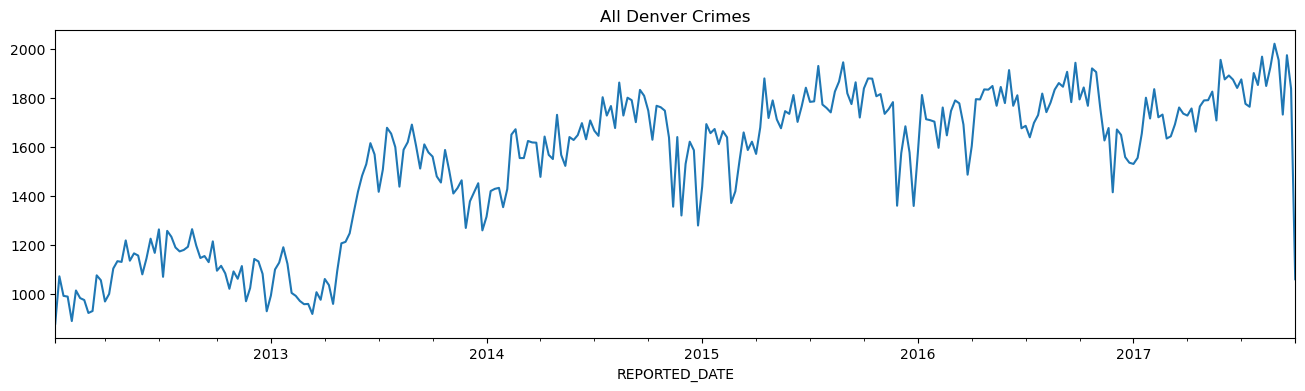

In [111]:
weekly_crimes.plot(figsize=(16,4), title='All Denver Crimes')

# Aggregating weekly crime and traffic separately
The Denver crime dataset has all crime and traffic accidents together in one table, and separates them through the binary columns, IS_CRIME and IS_TRAFFIC. The resample method allows you to group by a period of time and aggregate specific columns separately.

### Getting ready

In this recipe, we will use the resample method to group by each quarter of the year and then sum up the number of crimes and traffic accidents separately.

### How to do it...

Read in the crime hdf5 dataset, set the index as REPORTED_DATE, and then sort it to increase performance for the rest of the recipe:

In [112]:
crime_sort = pd.read_hdf('data/crime.h5', 'crime') \
               .set_index('REPORTED_DATE') \
               .sort_index()

Use the resample method to group by each quarter of the year and then sum the IS_CRIME and IS_TRAFFIC columns for each group:

In [113]:
crime_quarterly = crime_sort.resample('Q')['IS_CRIME', 'IS_TRAFFIC'].sum()
crime_quarterly.head()

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-03-31,7882,4726
2012-06-30,9641,5255
2012-09-30,10566,5003
2012-12-31,9197,4802
2013-03-31,8730,4442


Notice that the dates all appear as the last day of the quarter. This is because the offset alias, Q, represents the end of the quarter. Let's use the offset alias QS to represent the start of the quarter:

In [114]:
crime_sort.resample('QS')['IS_CRIME', 'IS_TRAFFIC'].sum().head()

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-01-01,7882,4726
2012-04-01,9641,5255
2012-07-01,10566,5003
2012-10-01,9197,4802
2013-01-01,8730,4442


Let's verify these results by checking whether the second quarter of data is correct:

In [115]:
crime_sort.loc['2012-4-1':'2012-6-30', ['IS_CRIME', 'IS_TRAFFIC']].sum()

IS_CRIME      9641
IS_TRAFFIC    5255
dtype: int64

It is possible to replicate this operation using the groupby method:

In [116]:
crime_quarterly_gby = crime_sort.groupby(pd.Grouper(freq='Q'))[['IS_CRIME', 'IS_TRAFFIC']].sum()
crime_quarterly_gby.equals(crime_quarterly)

True

Let's make a plot to better analyze the trends in crime and traffic accidents over time:

<Axes: title={'center': 'Denver Crimes and Traffic Accidents'}, xlabel='REPORTED_DATE'>

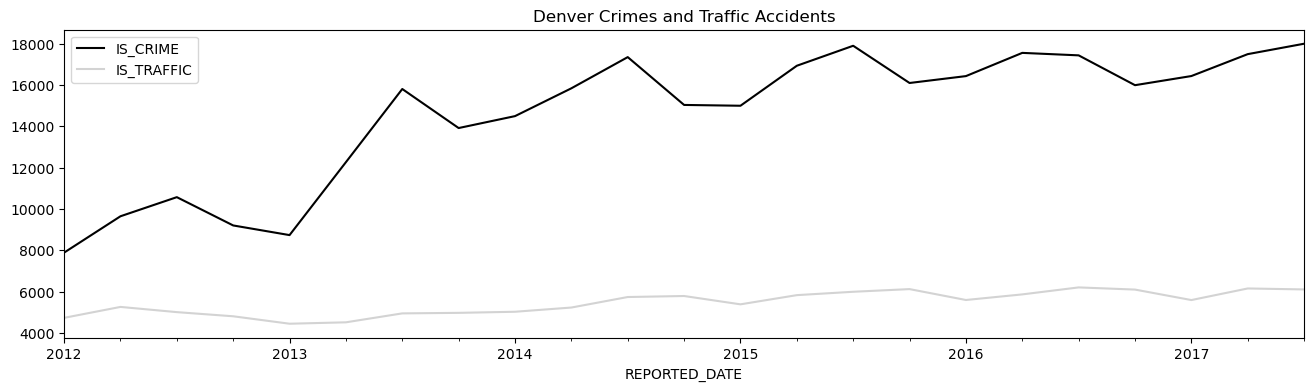

In [117]:
plot_kwargs = dict(figsize=(16,4), 
                   color=['black', 'lightgrey'], 
                   title='Denver Crimes and Traffic Accidents')
crime_quarterly.plot(**plot_kwargs)

### How it works...


After reading in and preparing our data in step 1, we begin grouping and aggregating in step 2. Immediately after calling the resample method, we can continue either by chaining a method or by selecting a group of columns to aggregate. We choose to select the IS_CRIME and IS_TRAFFIC columns to aggregate. If we didn't select just these two, then all of the numeric columns would have been summed with the following outcome:



In [118]:
crime_sort.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0


In [122]:
crime_sort.select_dtypes(include='number').resample('Q').sum().head()

,GEO_LON,GEO_LAT,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,
2012-03-31,-1.313006e+06,496960.237747,7882,4726
2012-06-30,-1.547274e+06,585656.789182,9641,5255
2012-09-30,-1.615835e+06,611604.800384,10566,5003
2012-12-31,-1.458177e+06,551923.040048,9197,4802
2013-03-31,-1.368931e+06,518159.721947,8730,4442


By default, the offset alias Q technically uses December 31st as the last day of the year. The span of dates that represent a single quarter are all calculated using this ending date. The aggregated result uses the last day of the quarter as its label. Step 3 uses the offset alias QS, which, by default, calculates quarters using January 1st as the first day of the year.

Most public businesses report quarterly earnings but they don't all have the same calendar year beginning in January. For instance, if we wanted our quarters to begin March 1st, then we could use QS-MAR to anchor our offset alias:

In [123]:
crime_sort.resample('QS-MAR')[['IS_CRIME', 'IS_TRAFFIC']].sum().head()

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2011-12-01,5013,3198
2012-03-01,9260,4954
2012-06-01,10524,5190
2012-09-01,9450,4777
2012-12-01,9003,4652


As in the preceding recipe, we verify our results via manual slicing and replicate the result with the groupby method using pd.Grouper to set our group length. In step 6, we make a single call to the DataFrame plot method. By default, a line is plotted for each column of data. The plot clearly shows a sharp increase in reported crimes during the first three quarters of the year. There also appears to be a seasonal component to both crime and traffic, with numbers lower in the cooler months and higher in the warmer months.

### There's more...

To get a different visual perspective, we can plot the percentage increase in crime and traffic, instead of the raw count. Let's divide all the data by the first row and plot again:



In [124]:
crime_begin = crime_quarterly.iloc[0]
crime_begin

IS_CRIME      7882
IS_TRAFFIC    4726
Name: 2012-03-31 00:00:00, dtype: int64

<Axes: title={'center': 'Denver Crimes and Traffic Accidents'}, xlabel='REPORTED_DATE'>

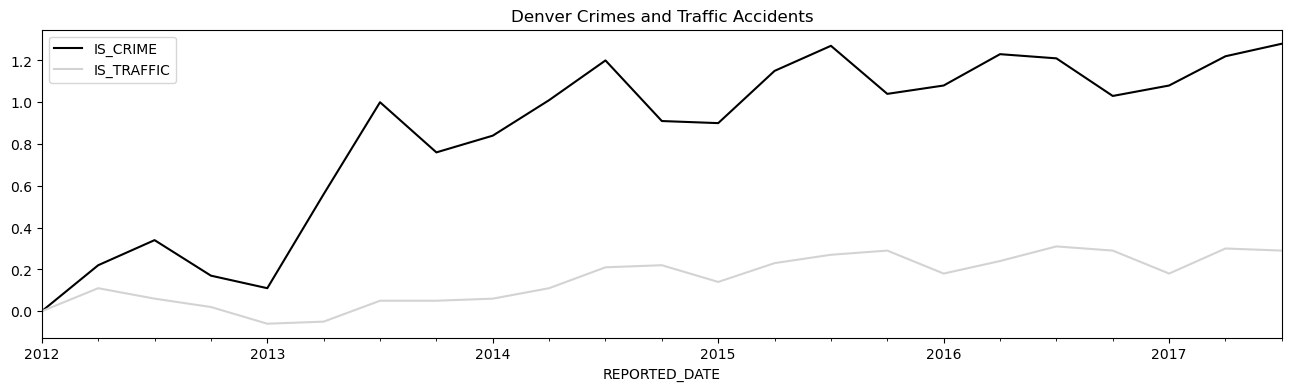

In [125]:
crime_quarterly.div(crime_begin) \
               .sub(1) \
               .round(2) \
               .plot(**plot_kwargs)

# Measuring crime by weekday and year
Measuring crimes by weekday and by year simultaneously necessitate the functionality to pull this information directly from a Timestamp. Thankfully, this functionality is built into any column consisting of Timestamps with the dt accessor.

### Getting ready

In this recipe, we will use the dt accessor to provide us with both the weekday name and year of each crime as a Series. We count all of the crimes by forming groups using both of these Series. Finally, we adjust the data to consider partial years and population before creating a heatmap of the total amount of crime.

### How to do it...
Read in the Denver crime hdf5 dataset leaving the REPORTED_DATE as a column

In [126]:
crime = pd.read_hdf('data/crime.h5', 'crime')
crime.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0


All Timestamp columns have a special attribute called the dt accessor, which gives access to a variety of extra attributes and methods specifically designed for them. Let's find the weekday name of each REPORTED_DATE and then count these values:

In [128]:
wd_counts = crime['REPORTED_DATE'].dt.day_name().value_counts()
wd_counts

REPORTED_DATE
Monday       70024
Friday       69621
Wednesday    69538
Thursday     69287
Tuesday      68394
Saturday     58834
Sunday       55213
Name: count, dtype: int64

The weekends appear to have substantially less crime and traffic accidents. Let's put this data in correct weekday order and make a horizontal bar plot:

<Axes: title={'center': 'Denver Crimes and Traffic Accidents per Weekday'}, ylabel='REPORTED_DATE'>

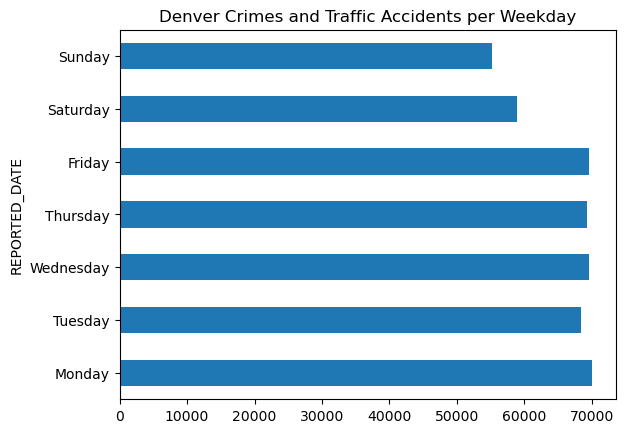

In [129]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 
        'Friday', 'Saturday', 'Sunday']
title = 'Denver Crimes and Traffic Accidents per Weekday'
wd_counts.reindex(days).plot(kind='barh', title=title)

We can do a very similar procedure to plot the count by year:

<Axes: title={'center': 'Denver Crimes and Traffic Accidents per Year'}, ylabel='REPORTED_DATE'>

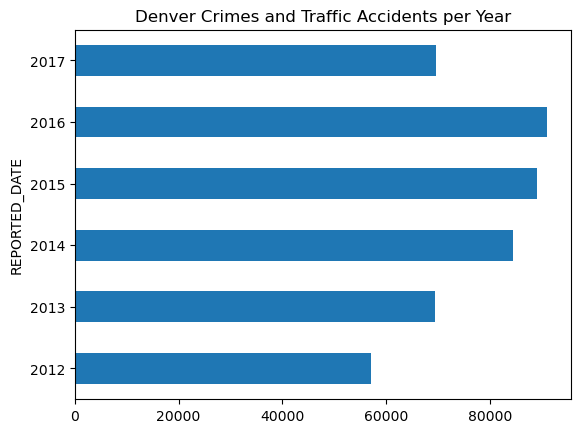

In [130]:
title = 'Denver Crimes and Traffic Accidents per Year' 
crime['REPORTED_DATE'].dt.year.value_counts() \
                              .sort_index() \
                              .plot(kind='barh', title=title)

We need to group by both weekday and year. One way of doing this is saving the weekday and year Series to separate variables and then using these variables with the groupby method:

In [131]:
weekday = crime['REPORTED_DATE'].dt.day_name()
year = crime['REPORTED_DATE'].dt.year

crime_wd_y = crime.groupby([year, weekday]).size()
crime_wd_y.head(10)

REPORTED_DATE  REPORTED_DATE
2012           Friday            8549
               Monday            8786
               Saturday          7442
               Sunday            7189
               Thursday          8440
               Tuesday           8191
               Wednesday         8440
2013           Friday           10380
               Monday           10627
               Saturday          8875
dtype: int64

We have aggregated the data correctly but the structure isn't exactly conducive to make comparisons easily. Let's first rename those meaningless index level names and then unstack the weekday level to get us a more readable table:


In [132]:
crime_table = crime_wd_y.rename_axis(['Year', 'Weekday']).unstack('Weekday')
crime_table

Weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Year,,,,,,,
2012,8549,8786,7442,7189,8440,8191,8440
2013,10380,10627,8875,8444,10431,10416,10354
2014,12683,12813,10950,10278,12309,12440,12948
2015,13273,13452,11586,10624,13512,13381,13320
2016,14059,13708,11467,10554,14050,13338,13900
2017,10677,10638,8514,8124,10545,10628,10576


We now have a nicer representation that is easier to read but noticeably, the 2017 numbers are incomplete. To help make a fairer comparison, we can make a simple linear extrapolation to estimate the final number of crimes. Let's first find the last day that we have data for in 2017:

In [133]:
criteria = crime['REPORTED_DATE'].dt.year == 2017
crime.loc[criteria, 'REPORTED_DATE'].dt.dayofyear.max()

272

A naive estimate would be to assume a constant rate of crime throughout the year and simply multiply all values in the 2017 table by 365/272. However, we can do a little better and look at our historical data and calculate the average percentage of crimes that have taken place through the first 272 days of the year:


In [134]:
round(272 / 365, 3)

0.745

In [135]:
crime_pct = crime['REPORTED_DATE'].dt.dayofyear.le(272) \
                                  .groupby(year) \
                                  .mean() \
                                  .round(3)
crime_pct

REPORTED_DATE
2012    0.748
2013    0.725
2014    0.751
2015    0.748
2016    0.752
2017    1.000
Name: REPORTED_DATE, dtype: float64

In [136]:
crime_pct.loc[2012:2016].median()

0.748

It turns out, perhaps very coincidentally, that the percentage of crimes that happen during the first 272 days of the year is almost exactly proportional to the percentage of days passed in the year. Let's now update the row for 2017 and change the column order to match the weekday order:

In [137]:
crime_table.loc[2017] = crime_table.loc[2017].div(.748).astype('int')
crime_table = crime_table.reindex(columns=days)
crime_table

Weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Year,,,,,,,
2012,8786,8191,8440,8440,8549,7442,7189
2013,10627,10416,10354,10431,10380,8875,8444
2014,12813,12440,12948,12309,12683,10950,10278
2015,13452,13381,13320,13512,13273,11586,10624
2016,13708,13338,13900,14050,14059,11467,10554
2017,14221,14208,14139,14097,14274,11382,10860


We could make a bar or line plot but this is also a good situation for a heatmap, which is available with the seaborn library:

<Axes: xlabel='Weekday', ylabel='Year'>

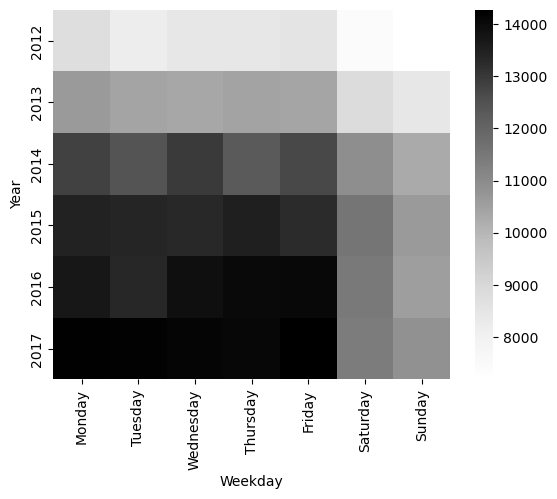

In [138]:
import seaborn as sns
sns.heatmap(crime_table, cmap='Greys')

Crime seems to be rising every year but this data does not account for rising population. Let's read in a table for the Denver population for each year that we have data:

In [139]:
denver_pop = pd.read_csv('data/denver_pop.csv', index_col='Year')
denver_pop

,Population
Year,
2017,705000
2016,693000
2015,680000
2014,662000
2013,647000
2012,634000


Many crime metrics are reported as rates per 100,000 residents. Let's divide the population by 100,000 and then divide the raw crime counts by this number to get the crime rate per 100,000 residents:

In [140]:
den_100k = denver_pop.div(100000).squeeze()
crime_table2 = crime_table.div(den_100k, axis='index').astype('int')
crime_table2

Weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Year,,,,,,,
2012,1385,1291,1331,1331,1348,1173,1133
2013,1642,1609,1600,1612,1604,1371,1305
2014,1935,1879,1955,1859,1915,1654,1552
2015,1978,1967,1958,1987,1951,1703,1562
2016,1978,1924,2005,2027,2028,1654,1522
2017,2017,2015,2005,1999,2024,1614,1540


Once again, we can make a heatmap that, even after adjusting for population increase, looks nearly identical to the first one:

<Axes: xlabel='Weekday', ylabel='Year'>

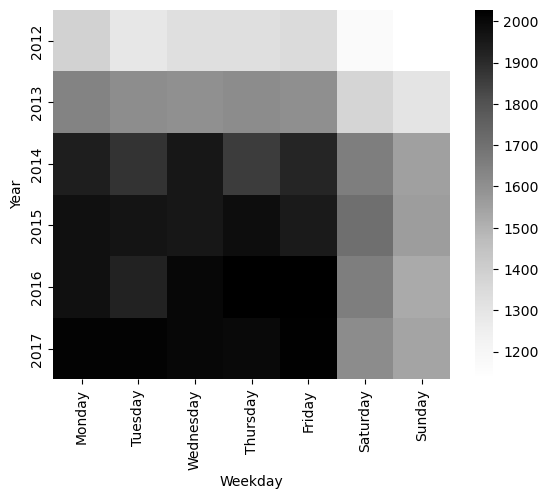

In [141]:
sns.heatmap(crime_table2, cmap='Greys')

### How it works...

All DataFrame columns containing Timestamps have access to numerous other attributes and methods with the dt accessor. In fact, all of these methods and attributes available from the dt accessor are also available directly from a single Timestamp object.

In step 2, we use the dt accessor, which only works on a Series, to extract the weekday name and simply count the occurrences. Before making a plot in step 3, we manually rearrange the order of the index with the reindex method, which, in its most basic use case, accepts a list containing the desired order. This task could have also been accomplished with the .loc indexer like this:

In [142]:
wd_counts.loc[days]

REPORTED_DATE
Monday       70024
Tuesday      68394
Wednesday    69538
Thursday     69287
Friday       69621
Saturday     58834
Sunday       55213
Name: count, dtype: int64

The reindex method is actually more performant and has many parameters for more diverse situations than .loc. We then use the weekday_name attribute of the dt accessor to retrieve the name of each day of the week, and count the occurrences before making a horizontal bar plot.

In step 4, we do a very similar procedure, and retrieve the year using the dt accessor again, and then count the occurrences with the value_counts method. In this instance, we use sort_index over reindex, as years will naturally sort in the desired order.

The goal of the recipe is to group by both weekday and year together so this is exactly what we do in step 5. The groupby method is very flexible and can form groups in multiple ways. In this recipe, we pass it two Series, year and weekday, from which all unique combinations form a group. We then chain the size method to it, which returns a single value, the length of each group.

After step 5, our Series is long with only a single column of data, which makes it difficult to make comparisons by year and weekday. To ease the readability, we pivot the weekday level into horizontal column names with unstack.

In step 7, we use boolean indexing to select only the crimes in 2017 and then use dayofyear from the dt accessor again to find the total elapsed days from the beginning of the year. The maximum of this Series should tell us how many days we have data for in 2017.

Step 8 is quite complex. We first create a boolean Series by testing whether each crime was committed on or before the 272nd day of the year with crime['REPORTED_DATE'].dt.dayofyear.le(272). From here, we again use the flexible groupby method to form groups by the previously calculated year Series and then use the mean method to find the percentage of crimes committed on or before the 272nd day for each year.

The .loc indexer selects the entire 2017 row of data in step 9. We adjust this row by dividing by the median percentage found in step 8.

Lots of crime visualizations are done with heatmaps and one is done here in step 10 with the help of the seaborn visualization library. The cmap parameter takes a string name of the several dozen available matplotlib colormaps (http://bit.ly/2yJZOvt).

In step 12, we create a crime rate per 100k residents by dividing by the population of that year. This is actually a fairly tricky operation. Normally, when you divide one DataFrame by another, they align on their columns and index. However, in this step, crime_table has no columns in common denver_pop so no values will align if we try and divide them. To work around this, we create the den_100k Series with the squeeze method. We still can't simply divide these two objects as, by default, division between a DataFrame and a Series aligns the columns of the DataFrame with the index of the Series, like this:



In [143]:
crime_table / den_100k

,2012,2013,2014,2015,2016,2017,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Year,,,,,,,,,,,,,
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We need the index of the DataFrame to align with the index of Series and to do this, we use the div method, which allows us to change the direction of alignment with the axis parameter. A heatmap of the adjusted crime rate is plotted in step 13.

### There's more...

Let's finalize this analysis by writing a function to complete all the steps of this recipe at once and add the ability to choose a specific type of crime:

In [146]:
ADJ_2017 = .748

def count_crime(df, offense_cat): 
    df = df[df['OFFENSE_CATEGORY_ID'] == offense_cat]
    weekday = df['REPORTED_DATE'].dt.day_name()
    year = df['REPORTED_DATE'].dt.year
    
    ct = df.groupby([year, weekday]).size().unstack()
    ct.loc[2017] = ct.loc[2017].div(ADJ_2017).astype('int')
    
    pop = pd.read_csv('data/denver_pop.csv', index_col='Year')
    pop = pop.squeeze().div(100000)
    
    ct = ct.div(pop, axis=0).astype('int')
    ct = ct.reindex(columns=days)
    sns.heatmap(ct, cmap='Greys')
    return ct

REPORTED_DATE,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
2012,95,72,72,76,71,78,76
2013,85,74,74,69,65,68,67
2014,94,76,72,70,76,67,67
2015,108,102,89,101,92,85,78
2016,119,102,100,99,97,86,85
2017,114,118,111,106,111,91,102


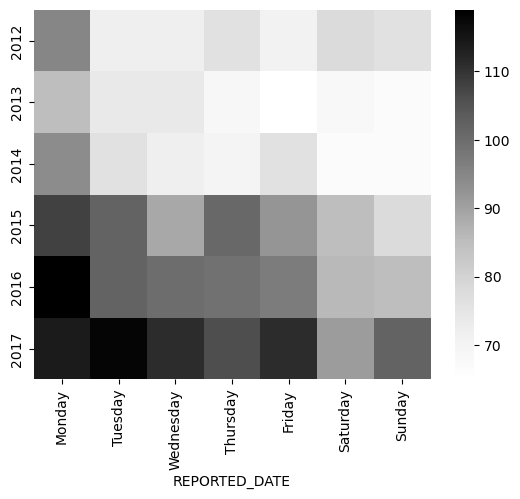

In [147]:
count_crime(crime, 'auto-theft')

# Grouping with anonymous functions with a DatetimeIndex
Using DataFrames with a DatetimeIndex opens the door to many new and different operations as seen with several recipes in this chapter.

### Getting ready

In this recipe, we will show the versatility of using the groupby method for DataFrames that have a DatetimeIndex.

### How to do it...

Read in the Denver crime hdf5 file, place the REPORTED_DATE column in the index, and sort it:

In [148]:
crime_sort = pd.read_hdf('data/crime.h5', 'crime') \
               .set_index('REPORTED_DATE') \
               .sort_index()

The DatetimeIndex itself has many of the same attributes and methods as a pandas Timestamp. Let's take a look at some that they have in common:

In [149]:
common_attrs = set(dir(crime_sort.index)) & set(dir(pd.Timestamp))
print([attr for attr in common_attrs if attr[0] != '_'])

['day_name', 'tz', 'minute', 'to_pydatetime', 'tzinfo', 'is_quarter_end', 'floor', 'year', 'as_unit', 'to_numpy', 'max', 'timetz', 'is_leap_year', 'dayofweek', 'day_of_year', 'nanosecond', 'to_julian_date', 'day_of_week', 'unit', 'month', 'days_in_month', 'isocalendar', 'is_month_end', 'normalize', 'strftime', 'dayofyear', 'resolution', 'tz_convert', 'min', 'hour', 'daysinmonth', 'second', 'quarter', 'ceil', 'tz_localize', 'month_name', 'is_month_start', 'day', 'time', 'round', 'to_period', 'is_quarter_start', 'microsecond', 'is_year_start', 'weekday', 'date', 'is_year_end']


We can then use the index to find weekday names, similarly to what was done in step 2 of the preceding recipe:

In [151]:
crime_sort.index.day_name().value_counts()

REPORTED_DATE
Monday       70024
Friday       69621
Wednesday    69538
Thursday     69287
Tuesday      68394
Saturday     58834
Sunday       55213
Name: count, dtype: int64

Somewhat surprisingly, the groupby method has the ability to accept a function as an argument. This function will be implicitly passed the index and its return value is used to form groups. Let's see this in action by grouping with a function that turns the index into a weekday name and then counts the number of crimes and traffic accidents separately:


In [238]:
crime_sort.groupby(lambda x: x.weekday_name)['IS_CRIME', 'IS_TRAFFIC'].sum()

,IS_CRIME,IS_TRAFFIC
Friday,48833,20814
Monday,52158,17895
Saturday,43363,15516
Sunday,42315,12968
Thursday,49470,19845
Tuesday,49658,18755
Wednesday,50054,19508


You can use a list of functions to group by both the hour of day and year, and then reshape the table to make it more readable:

In [154]:
funcs = [lambda x: x.round('2h').hour, lambda x: x.year]
cr_group = crime_sort.groupby(funcs)[['IS_CRIME', 'IS_TRAFFIC']].sum()
cr_final = cr_group.unstack()
cr_final.style.highlight_max(color='lightgrey')

### How it works...

In step 1, we read in our data and place a column of Timestamps into the index to create a DatetimeIndex. In step 2, we see that a DatetimeIndex has lots of the same functionality that a single Timestamp object has. In step 3, we directly use these extra features of the DatetimeIndex to extract the weekday name.

In step 4, we take advantage of the special ability of the groupby method to accept a function that is passed the DatetimeIndex. The x in the anonymous function is literally the DatetimeIndex and we use it to retrieve the weekday name. It is possible to pass groupby a list of any number of custom functions, as done in step 5. Here, the first function uses the round DatetimeIndex method to round each value to the nearest second hour. The second function retrieves the year. After the grouping and aggregating, we unstack the years as columns. We then highlight the maximum value of each column. Crime is reported most often between 3 and 5 p.m. Most traffic accidents occur between 5 p.m. and 7 p.m.

### There's more...

The final result of this recipe is a DataFrame with MultiIndex columns. Using this DataFrame, it is possible to select just the crime or traffic accidents separately. The xs method allows you to select a single value from any index level. Let's see an example where we select only the section of data dealing with traffic:

In [155]:
cr_final.xs('IS_TRAFFIC', axis='columns', level=0).head()

REPORTED_DATE,2012,2013,2014,2015,2016,2017
REPORTED_DATE,,,,,,
0,919,792,978,1136,980,782
2,718,652,779,773,718,537
4,399,378,424,471,464,313
6,411,399,479,494,593,462
8,1957,1955,2210,2331,2372,1828


This is referred to as taking a cross section in pandas. We must use the axis and level parameters to specifically denote where our value is located. Let's use xs again to select only data from 2016, which is in a different level:

In [156]:
cr_final.xs(2016, axis='columns', level=1).head()

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
0,5377,980
2,4091,718
4,3044,464
6,2108,593
8,4488,2372


# Grouping by a DatetimeIndex and another column
The resample method on its own, is unable to group by anything other than periods of time. The groupby method, however, has the ability to group by both periods of time and other columns.

### Getting ready

In this recipe, we will show two very similar but different approaches to group by Timestamps and another column.

### How to do it...

Read in the employee dataset, and create a DatetimeIndex with the HIRE_DATE column:

In [157]:
employee = pd.read_csv('data/employee.csv', 
                       parse_dates=['JOB_DATE', 'HIRE_DATE'], 
                       index_col='HIRE_DATE')
employee.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,JOB_DATE
HIRE_DATE,,,,,,,,,
2006-06-12,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2012-10-13
2000-07-19,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2010-09-18
2015-02-03,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03
1982-02-08,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1991-05-25
1989-06-19,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1994-10-22


Let's first do a simple grouping by just gender, and find the average salary for each:

In [158]:
employee.groupby('GENDER')['BASE_SALARY'].mean().round(-2)

GENDER
Female    52200.0
Male      57400.0
Name: BASE_SALARY, dtype: float64

Let's find the average salary based on hire date, and group everyone into 10-year buckets:

In [159]:
employee.resample('10AS')['BASE_SALARY'].mean().round(-2)

HIRE_DATE
1958-01-01     81200.0
1968-01-01    106500.0
1978-01-01     69600.0
1988-01-01     62300.0
1998-01-01     58200.0
2008-01-01     47200.0
Freq: 10AS-JAN, Name: BASE_SALARY, dtype: float64

If we wanted to group by both gender and a five-year time span, we can call resample directly after calling groupby:

In [160]:
sal_avg = employee.groupby('GENDER').resample('10AS')['BASE_SALARY'].mean().round(-2)
sal_avg

GENDER  HIRE_DATE 
Female  1975-01-01     51600.0
        1985-01-01     57600.0
        1995-01-01     55500.0
        2005-01-01     51700.0
        2015-01-01     38600.0
Male    1958-01-01     81200.0
        1968-01-01    106500.0
        1978-01-01     72300.0
        1988-01-01     64600.0
        1998-01-01     59700.0
        2008-01-01     47200.0
Name: BASE_SALARY, dtype: float64

Now, this does what we set out to do, but we run into a slight issue whenever we want to compare female to male salaries. Let's unstack the gender level and see what happens:

In [161]:
sal_avg.unstack('GENDER')

GENDER,Female,Male
HIRE_DATE,,
1958-01-01,NaN,81200.0
1968-01-01,NaN,106500.0
1975-01-01,51600.0,NaN
1978-01-01,NaN,72300.0
1985-01-01,57600.0,NaN
1988-01-01,NaN,64600.0
1995-01-01,55500.0,NaN
1998-01-01,NaN,59700.0
2005-01-01,51700.0,NaN


The 10-year periods for males and females do not begin on the same date. This happened because the data was first grouped by gender and then, within each gender, more groups were formed based on hire dates. Let's verify that the first hired male was in 1958 and the first hired female was in 1975:

In [162]:
employee[employee['GENDER'] == 'Male'].index.min()

Timestamp('1958-12-29 00:00:00')

In [163]:
employee[employee['GENDER'] == 'Female'].index.min()

Timestamp('1975-06-09 00:00:00')

To resolve this issue, we must group the date together with the gender, and this is only possible with the groupby method:


In [164]:
sal_avg2 = employee.groupby(['GENDER', pd.Grouper(freq='10AS')])['BASE_SALARY'].mean().round(-2)
sal_avg2

GENDER  HIRE_DATE 
Female  1968-01-01         NaN
        1978-01-01     57100.0
        1988-01-01     57100.0
        1998-01-01     54700.0
        2008-01-01     47300.0
Male    1958-01-01     81200.0
        1968-01-01    106500.0
        1978-01-01     72300.0
        1988-01-01     64600.0
        1998-01-01     59700.0
        2008-01-01     47200.0
Name: BASE_SALARY, dtype: float64

Now we can unstack the gender and get our rows aligned perfectly:

In [165]:
sal_final = sal_avg2.unstack('GENDER')
sal_final

GENDER,Female,Male
HIRE_DATE,,
1958-01-01,NaN,81200.0
1968-01-01,NaN,106500.0
1978-01-01,57100.0,72300.0
1988-01-01,57100.0,64600.0
1998-01-01,54700.0,59700.0
2008-01-01,47300.0,47200.0


### How it works...

The read_csv function in step 1 allows to both convert columns into Timestamps and put them in the index at the same time creating a DatetimeIndex. Steps 2 does a simple groupby operation with a single grouping column, gender. Step 3 uses the resample method with the offset alias 10AS to form groups in 10-year increments of time. The A is the alias for year and the S informs us that the beginning of the period is used as the label. For instance, the data for the label 1988-01-01 spans that date until December 31, 1997.

Interestingly, the object returned from a call to the groupby method has its own resample method, but the reverse is not true:



In [166]:
'resample' in dir(employee.groupby('GENDER'))

True

In [167]:
'groupby' in dir(employee.resample('10AS'))

False

In step 4, for each gender, male and female, completely different starting dates for the 10-year periods are calculated based on the earliest hired employee. Step 6 verifies that the year of the earliest hired employee for each gender matches the output from step 4. Step 5 shows how this causes misalignment when we try to compare salaries of females to males. They don't have the same 10-year periods.

To alleviate this issue, we must group both the gender and Timestamp together. The resample method is only capable of grouping by a single column of Timestamps. We can only complete this operation with the groupby method. With pd.Grouper, we can replicate the functionality of resample. We simply pass the offset alias to the freq parameter and then place the object in a list with all the other columns that we wish to group, as done in step 7. As both males and females now have the same starting dates for the 10-year period, the reshaped data in step 8 will align for each gender making comparisons much easier. It appears that male salaries tend to be higher given a longer length of employment, though both genders have the same average salary with under 10 years of employment.

### There's more...

From an outsider's perspective, it would not be obvious that the rows from the output in step 8 represented 10-year intervals. One way to improve the index labels would be to show the beginning and end of each time interval. We can achieve this by concatenating the current index year with 9 added to itself:



In [168]:
years = sal_final.index.year
years_right = years + 9
sal_final.index = years.astype(str) + '-' + years_right.astype(str)
sal_final

GENDER,Female,Male
HIRE_DATE,,
1958-1967,NaN,81200.0
1968-1977,NaN,106500.0
1978-1987,57100.0,72300.0
1988-1997,57100.0,64600.0
1998-2007,54700.0,59700.0
2008-2017,47300.0,47200.0


There is actually a completely different way to do this recipe. We can use the cut function to create equal-width intervals based on the year that each employee was hired and form groups from it:



In [169]:
cuts = pd.cut(employee.index.year, bins=5, precision=0)
cuts.categories.values

<IntervalArray>
[(1958.0, 1970.0], (1970.0, 1981.0], (1981.0, 1993.0], (1993.0, 2004.0], (2004.0, 2016.0]]
Length: 5, dtype: interval[float64, right]

In [170]:
employee.groupby([cuts, 'GENDER'])['BASE_SALARY'].mean().unstack('GENDER').round(-2)

C:\Users\Sumanth\AppData\Local\Temp\ipykernel_8208\1248132690.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  employee.groupby([cuts, 'GENDER'])['BASE_SALARY'].mean().unstack('GENDER').round(-2)


GENDER,Female,Male
"(1958.0, 1970.0]",NaN,85400.0
"(1970.0, 1981.0]",54400.0,72700.0
"(1981.0, 1993.0]",55700.0,69300.0
"(1993.0, 2004.0]",56500.0,62300.0
"(2004.0, 2016.0]",49100.0,49800.0


# Finding the last time crime was 20% lower with merge_asof
There are frequently times where we would like to know when the last time something happened. For example, we might be interested in the last time unemployment was below 5% or the last time the stock market went up five days in a row or the last time you had eight hours of sleep. The merge_asof function provides answers to these types of questions.

### Getting ready

In this recipe, we will find the current month's total number of crimes for each offense category and then find the last time there were 20% fewer incidences.

### How to do it...

Read in the Denver crime dataset, place the REPORTED_DATE in the index, and sort it:

In [171]:
crime_sort = pd.read_hdf('data/crime.h5', 'crime') \
               .set_index('REPORTED_DATE') \
               .sort_index()

Find the last full month of data:

In [172]:
crime_sort.index.max()

Timestamp('2017-09-29 06:16:00')

As we don't quite have all of September's data, let's drop it from our dataset:

In [173]:
crime_sort = crime_sort[:'2017-8']
crime_sort.index.max()

Timestamp('2017-08-31 23:52:00')

Let's count the number of crimes and traffic accidents for every month:

In [174]:
all_data = crime_sort.groupby([pd.Grouper(freq='M'), 'OFFENSE_CATEGORY_ID']).size()
all_data.head()

C:\Users\Sumanth\AppData\Local\Temp\ipykernel_8208\1143928264.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  all_data = crime_sort.groupby([pd.Grouper(freq='M'), 'OFFENSE_CATEGORY_ID']).size()


REPORTED_DATE  OFFENSE_CATEGORY_ID
2012-01-31     aggravated-assault     113
               all-other-crimes       124
               arson                    5
               auto-theft             275
               burglary               343
dtype: int64

Although the merge_asof function can work with the index, it will be easier to just reset it:

In [175]:
all_data = all_data.sort_values().reset_index(name='Total')
all_data.head()

,REPORTED_DATE,OFFENSE_CATEGORY_ID,Total
0,2012-01-31,murder,0
1,2016-05-31,murder,1
2,2013-01-31,arson,1
3,2016-12-31,murder,1
4,2014-12-31,murder,1


Let's get the current month's crime count and make a new column to represent the goal:

In [179]:
goal = all_data[all_data['REPORTED_DATE'] == '2017-8-31'].reset_index(drop=True)
goal['Total_Goal'] = goal['Total'].mul(.8).astype(np.int64)
goal.head()

,REPORTED_DATE,OFFENSE_CATEGORY_ID,Total,Total_Goal
0,2017-08-31,murder,7,5
1,2017-08-31,arson,7,5
2,2017-08-31,sexual-assault,57,45
3,2017-08-31,robbery,108,86
4,2017-08-31,white-collar-crime,138,110


In [180]:
goal.dtypes

REPORTED_DATE          datetime64[ns]
OFFENSE_CATEGORY_ID          category
Total                           int64
Total_Goal                      int64
dtype: object

Now use the merge_asof function to find the last time a monthly crime total was less than the column Total_Goal for each offense category:

In [181]:
pd.merge_asof(goal, all_data, left_on='Total_Goal', right_on='Total', 
              by='OFFENSE_CATEGORY_ID', suffixes=('_Current', '_Last'))

,REPORTED_DATE_Current,OFFENSE_CATEGORY_ID,Total_Current,Total_Goal,REPORTED_DATE_Last,Total_Last
0,2017-08-31,murder,7,5,2017-05-31,5
1,2017-08-31,arson,7,5,2012-01-31,5
2,2017-08-31,sexual-assault,57,45,2013-01-31,45
3,2017-08-31,robbery,108,86,2015-03-31,86
4,2017-08-31,white-collar-crime,138,110,2016-10-31,110
5,2017-08-31,aggravated-assault,195,156,2016-05-31,154
6,2017-08-31,other-crimes-against-persons,376,300,2014-04-30,285
7,2017-08-31,burglary,432,345,2012-01-31,343
8,2017-08-31,auto-theft,599,479,2017-07-31,477
9,2017-08-31,drug-alcohol,636,508,2015-05-31,505


### How it works...

 

After reading in our data, we decide not to include the 2017 September data, as it is not quite a complete month. We use a partial date string to slice all the way up to and including any crimes in August of 2017. In step 4, we tally all the crimes for each offense category per month, and in step 5, we sort by this total, which is required for merge_asof.

In step 6, we select the most recent data into a separate DataFrame. We will use this month of August as our baseline and create a column, Total_Goal, that is 20% less than the current. In step 7, we use merge_asof to find the last time a monthly crime count was less than the Total_Goalcolumn.

### There's more...

In addition to the Timestamp and Timedelta data types, pandas offers the Period type to represent an exact time period. For example, 2012-05 would represent the entire month of May, 2012. You can manually construct a Period in the following manner:



In [182]:
pd.Period(year=2012, month=5, day=17, hour=14, minute=20, freq='T')

Period('2012-05-17 14:20', 'T')

This object represents the entire minute of May 17, 2012 at 2:20 p.m. It is possible to use these Periods in step 4 instead of grouping by date with pd.Grouper. DataFrames with a DatetimeIndex have the to_period method to convert Timestamps to Periods. It accepts an offset alias to determine the exact length of the time period.



In [183]:
ad_period = crime_sort.groupby([lambda x: x.to_period('M'), 
                                    'OFFENSE_CATEGORY_ID']).size()
ad_period = ad_period.sort_values() \
                         .reset_index(name='Total') \
                         .rename(columns={'level_0':'REPORTED_DATE'})
ad_period.head()

C:\Users\Sumanth\AppData\Local\Temp\ipykernel_8208\3515733445.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ad_period = crime_sort.groupby([lambda x: x.to_period('M'),


,REPORTED_DATE,OFFENSE_CATEGORY_ID,Total
0,2012-01,murder,0
1,2016-05,murder,1
2,2013-01,arson,1
3,2016-12,murder,1
4,2014-12,murder,1


Let's verify that the last two columns from this DataFrame are equivalent to all_data from step 5:

In [184]:
cols = ['OFFENSE_CATEGORY_ID', 'Total']
all_data[cols].equals(ad_period[cols])

True

Steps 6 and 7 can now be replicated in almost the exact same manner with the following code:



In [186]:
aug_2018 = pd.Period('2017-8', freq='M')
goal_period = ad_period[ad_period['REPORTED_DATE'] == aug_2018] \
                           .reset_index(drop=True)
goal_period['Total_Goal'] = goal_period['Total'].mul(.8).astype(np.int64)

pd.merge_asof(goal_period, ad_period, left_on='Total_Goal',
                  right_on='Total', by='OFFENSE_CATEGORY_ID',
                  suffixes=('_Current', '_Last')).head()

,REPORTED_DATE_Current,OFFENSE_CATEGORY_ID,Total_Current,Total_Goal,REPORTED_DATE_Last,Total_Last
0,2017-08,murder,7,5,2017-05,5
1,2017-08,arson,7,5,2012-01,5
2,2017-08,sexual-assault,57,45,2013-01,45
3,2017-08,robbery,108,86,2015-03,86
4,2017-08,white-collar-crime,138,110,2016-10,110
